# DATA SCIENCE ASSIGNMENT-4
## _Abhishek_Sutar

## 4) Data Analytics I
### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and
### 14 feature variables in this dataset.The objective is to predict the value of prices of the house using the given features.

In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

df=pd.read_csv(r"path")
df

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [110]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [111]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [112]:
df.isnull().values.any()

True

In [113]:
df.isnull().sum().sum()

1466

In [114]:
df.drop(['Id'],axis=1,inplace=True)


In [115]:
#pd.get_dummies(df, columns=['MSZoning'])
#pd.get_dummies(df, columns=['LotConfig'])


#pd.get_dummies(df, columns=['Exterior1st'])
#pd.get_dummies(df, columns=['BldgType'])
#df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mean())

In [116]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [117]:
df1=df.drop(['MSZoning', 'Exterior1st','LotConfig','BldgType'], axis=1)

In [118]:
df1

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,NaN
2915,160,1894,5,1970,1970,0.0,546.0,NaN
2916,20,20000,7,1960,1996,0.0,1224.0,NaN
2917,85,10441,5,1992,1992,0.0,912.0,NaN


In [119]:
df1['SalePrice'] = df1['SalePrice'].fillna(df1['SalePrice'].mean())


In [120]:
df1

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [121]:
df1.dropna()


,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [122]:
df1.shape

(2919, 8)

In [123]:
df1.isnull().sum()


MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [124]:
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna(df1['BsmtFinSF2'].mean())

In [125]:
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(df1['TotalBsmtSF'].mean())

In [126]:
df1.isnull().sum()


MSSubClass      0
LotArea         0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [127]:
df1.isnull().sum().sum()

0

In [128]:
df1['BsmtFinSF2'].isnull().values.any()

False

In [129]:
df1['TotalBsmtSF'].isnull().values.any()

False

In [130]:
 df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(df1['TotalBsmtSF'].mean())

In [131]:
df1['TotalBsmtSF'].isnull().values.any()

False

In [132]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [133]:
X = df1.drop(['SalePrice'], axis=1)
y = df1['SalePrice']

In [134]:
X.shape

(2919, 7)

In [135]:
#y.shapepd.get_dummies(df, columns=['MSZoning'])
#pd.get_dummies(df, columns=['LotConfig'])
#pd.get_dummies(df, columns=['Exterior1st'])
#pd

In [136]:
df1

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.00000
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000
2,60,11250,5,2001,2002,0.0,920.0,223500.00000
3,70,9550,5,1915,1970,0.0,756.0,140000.00000
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000
...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2335, 7) (584, 7)
(2335,) (584,)


In [138]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_)
pred=model.predict(X_train)


[ 2.25787575e+01  1.16688723e+00  2.93547704e+03  2.98126068e+02
  4.13888436e+02 -1.07007996e+01  3.54622884e+01]


In [139]:
pred

array([163269.86681688, 206426.17432481, 189499.15029204, ...,
       145876.2704995 , 172825.90127252, 169802.92363401])

In [140]:
scor1=metrics.r2_score(y_train,pred)
scor1

0.2655549097390616

In [141]:
scor2=metrics.mean_absolute_error(y_train,pred)
scor2

32144.57059696276

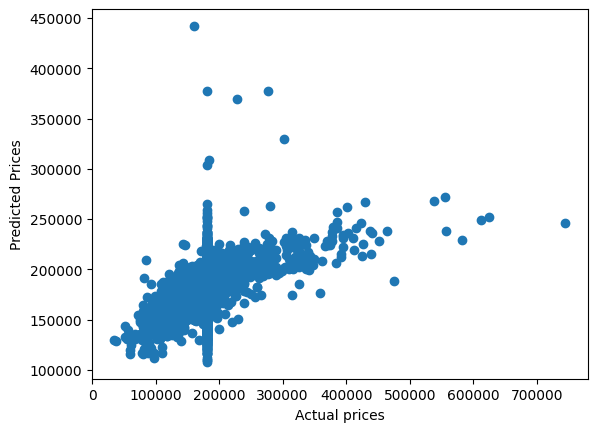

In [142]:
plt.scatter(y_train,pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.show()

In [144]:
predt=model.predict(X_test)
predt

array([158407.72117255, 185906.91456167, 163239.14280763, 190551.28172577,
       191922.07905873, 221513.70640514, 140340.23655513, 207537.50489636,
       125127.67226044, 197874.35950643, 180107.53720224, 194469.16485797,
       165329.5520795 , 196999.32717135, 182833.8114544 , 188271.00160098,
       163207.15378192, 190044.17444737, 133077.72536606, 161861.12183488,
       197256.90949045, 134742.31749888, 134709.52518038, 197106.14079945,
       207631.77305417, 189568.61747024, 185286.78864137, 153090.56504225,
       201168.19895009, 163366.45906172, 225699.64441927, 158417.54028829,
       194241.58757275, 192753.25472668, 204632.63974568, 210109.20125908,
       175640.72854537, 167266.0324331 , 157799.30568414, 171266.87257823,
       134837.44488666, 188198.66073796, 222974.36733793, 174497.18167904,
       170260.48747493, 175088.36525242, 204159.08307438, 185192.99143948,
       176853.96966116, 241553.10017704, 153473.97494097, 184690.88483713,
       143794.98614732, 2

In [145]:
scor1=metrics.r2_score(y_test,predt)
scor1

0.3188204143946495

In [146]:
scor2=metrics.mean_absolute_error(y_test,predt)
scor2

32837.31563094554

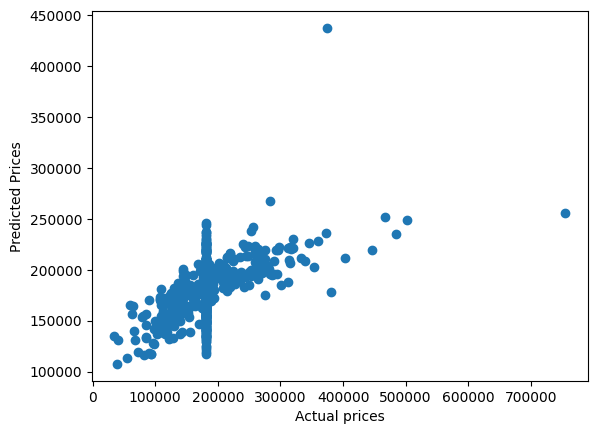

In [147]:
plt.scatter(y_test,predt)
plt.xlabel("Actual prices")
plt.ylabel("Predicted Prices")
plt.show()